## Exploratory Data Analysis

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
%matplotlib inline

In [50]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("games.csv")

### Look at some sample data

In [4]:
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [5]:
df.shape # get the row shape

(81312, 20)

In [6]:
df.info() # for additional information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

In [7]:
df['type'].value_counts() # Check the individual counts

boardgame             70820
boardgameexpansion    10492
Name: type, dtype: int64

### Basic description of the data
It shows various summary statistics exclude null values

### Descirbe for numerical data

In [59]:
df.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


### Describe for categorical data

In [94]:
df.describe(include=[np.object])

,type,name
count,81312,81271
unique,2,76035
top,boardgame,
freq,70820,16


### Check null values in the dataset

In [9]:
df.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [11]:
df.tail()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81311,184451,boardgame,Bingo Animal Kids,2010.0,1.0,6.0,10.0,10.0,10.0,2.0,0,0.0,0.0,0,0,0,0,0,0,0.0


In [95]:
print(df['average_rating'].value_counts())

0.00000     24380
6.00000      2854
5.00000      2623
7.00000      2315
4.00000      2004
8.00000      1519
3.00000      1440
5.50000      1179
6.50000       970
4.50000       791
2.00000       740
7.50000       737
9.00000       598
1.00000       472
3.50000       456
10.00000      418
5.66667       309
6.75000       305
8.50000       299
5.75000       297
6.25000       284
6.33333       277
6.66667       267
5.25000       261
5.33333       249
7.25000       231
4.33333       217
4.66667       213
4.75000       210
7.33333       181
            ...  
7.81639         1
7.41949         1
7.03944         1
5.77812         1
5.73920         1
5.51415         1
5.35476         1
7.56923         1
5.45789         1
7.63036         1
6.40163         1
4.56092         1
6.30759         1
6.93733         1
6.15344         1
5.06875         1
5.65135         1
7.48095         1
6.68925         1
4.83462         1
5.67794         1
6.11556         1
7.66122         1
8.28947         1
6.31584   

### Examine numerical features in the dataset

In [13]:
numerical_features = df.select_dtypes(include=[np.number])

In [41]:
print(numerical_features.columns)

Index(['id', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'bayes_average_rating', 'total_owners', 'total_traders',
       'total_wanters', 'total_wishers', 'total_comments', 'total_weights',
       'average_weight'],
      dtype='object')


### Examine categorical features in the dataset

In [16]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['type', 'name'], dtype='object')

### Estimate Skewness
Skewness tells the amount and direction of skew

In [17]:
df.skew()

id                        0.484032
yearpublished            -2.788235
minplayers               20.284378
maxplayers              172.168409
playingtime             135.214355
minplaytime             147.034600
maxplaytime             135.214355
minage                    0.267726
users_rated              20.057651
average_rating           -0.360838
bayes_average_rating      1.550502
total_owners             18.709933
total_traders            11.079425
total_wanters            10.379047
total_wishers            12.570804
total_comments           15.979359
total_weights            22.588496
average_weight            1.023084
dtype: float64

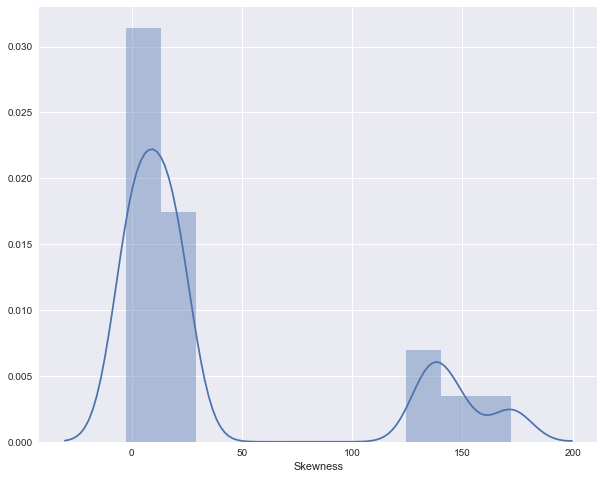

In [75]:
plt.figure(figsize=(10,8))
sns.distplot(df.skew(),axlabel="Skewness")

In [18]:
df.kurt()

id                         -1.275720
yearpublished               6.027895
minplayers               1642.182461
maxplayers              32695.957307
playingtime             22567.180920
minplaytime             25669.940260
maxplaytime             22567.180920
minage                      6.144802
users_rated               604.422241
average_rating             -1.391075
bayes_average_rating        0.471176
total_owners              558.989467
total_traders             193.031576
total_wanters             144.144425
total_wishers             211.390819
total_comments            393.996488
total_weights             788.612032
average_weight             -0.002202
dtype: float64

In [46]:
import scipy.stats as st

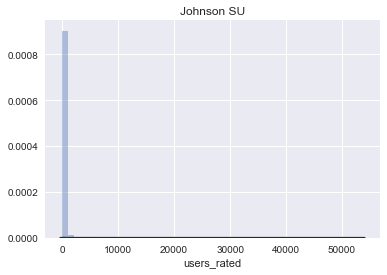

In [51]:
y = numerical_features['users_rated']
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y,kde=False,fit=st.johnsonsu)

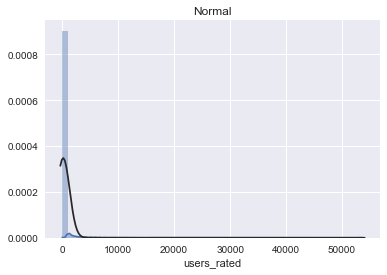

In [53]:
plt.figure(2)
plt.title("Normal")
sns.distplot(y,kde='False',fit=st.norm)


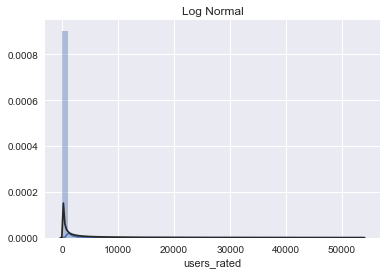

In [55]:
plt.figure(3)
plt.title("Log Normal")
sns.distplot(y,kde='True',fit=st.lognorm)

In [64]:
# Check correlation
correlation = numerical_features.corr()
correlation

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
id,1.000000,-0.043301,-0.038692,0.008301,-0.020923,-0.027433,-0.020923,0.109934,-0.066714,-0.083589,-0.159523,-0.056909,-0.122875,-0.013829,-0.003284,-0.096862,-0.083928,-0.155594
yearpublished,-0.043301,1.000000,0.003810,0.004547,0.012326,0.011716,0.012326,0.113047,0.042125,0.191931,0.149452,0.052936,0.070809,0.066355,0.056331,0.050055,0.041363,0.160987
minplayers,-0.038692,0.003810,1.000000,0.043628,0.034162,0.036672,0.034162,0.113727,0.016364,0.009179,0.030298,0.012693,0.020552,-0.003573,-0.000580,0.018625,0.015451,-0.002689
maxplayers,0.008301,0.004547,0.043628,1.000000,0.000116,0.000160,0.000116,0.008974,-0.000810,-0.004300,-0.003034,-0.000933,-0.002038,-0.002925,-0.002088,-0.001333,-0.001265,-0.009978
playingtime,-0.020923,0.012326,0.034162,0.000116,1.000000,0.968188,1.000000,0.063088,0.014068,0.053804,0.054041,0.018364,0.024252,0.028698,0.024148,0.020645,0.020826,0.096416
minplaytime,-0.027433,0.011716,0.036672,0.000160,0.968188,1.000000,0.968188,0.061005,0.008842,0.052346,0.051023,0.013017,0.019719,0.022154,0.016811,0.014038,0.013434,0.090998
maxplaytime,-0.020923,0.012326,0.034162,0.000116,1.000000,0.968188,1.000000,0.063088,0.014068,0.053804,0.054041,0.018364,0.024252,0.028698,0.024148,0.020645,0.020826,0.096416
minage,0.109934,0.113047,0.113727,0.008974,0.063088,0.061005,0.063088,1.000000,0.095895,0.240032,0.263977,0.116266,0.149634,0.148763,0.132206,0.111979,0.095348,0.276406
users_rated,-0.066714,0.042125,0.016364,-0.000810,0.014068,0.008842,0.014068,0.095895,1.000000,0.131803,0.329520,0.977679,0.809149,0.705431,0.806851,0.978726,0.975932,0.172907
average_rating,-0.083589,0.191931,0.009179,-0.004300,0.053804,0.052346,0.053804,0.240032,0.131803,1.000000,0.386627,0.161397,0.186959,0.204421,0.176191,0.154758,0.130914,0.554294


In [66]:
print(correlation['users_rated'].sort_values(ascending =False), '\n')

users_rated             1.000000
total_comments          0.978726
total_owners            0.977679
total_weights           0.975932
total_traders           0.809149
total_wishers           0.806851
total_wanters           0.705431
bayes_average_rating    0.329520
average_weight          0.172907
average_rating          0.131803
minage                  0.095895
yearpublished           0.042125
minplayers              0.016364
maxplaytime             0.014068
playingtime             0.014068
minplaytime             0.008842
maxplayers             -0.000810
id                     -0.066714
Name: users_rated, dtype: float64 



### Heatmap

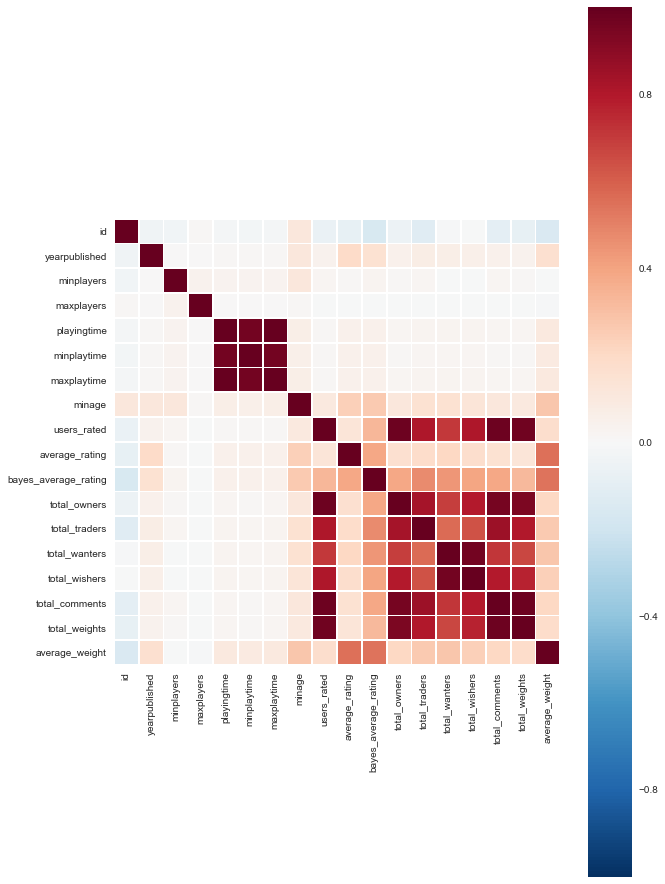

In [70]:
plt.figure(figsize=(10,16))
sns.heatmap(correlation,square=True,annot=False,linewidths=0.8)

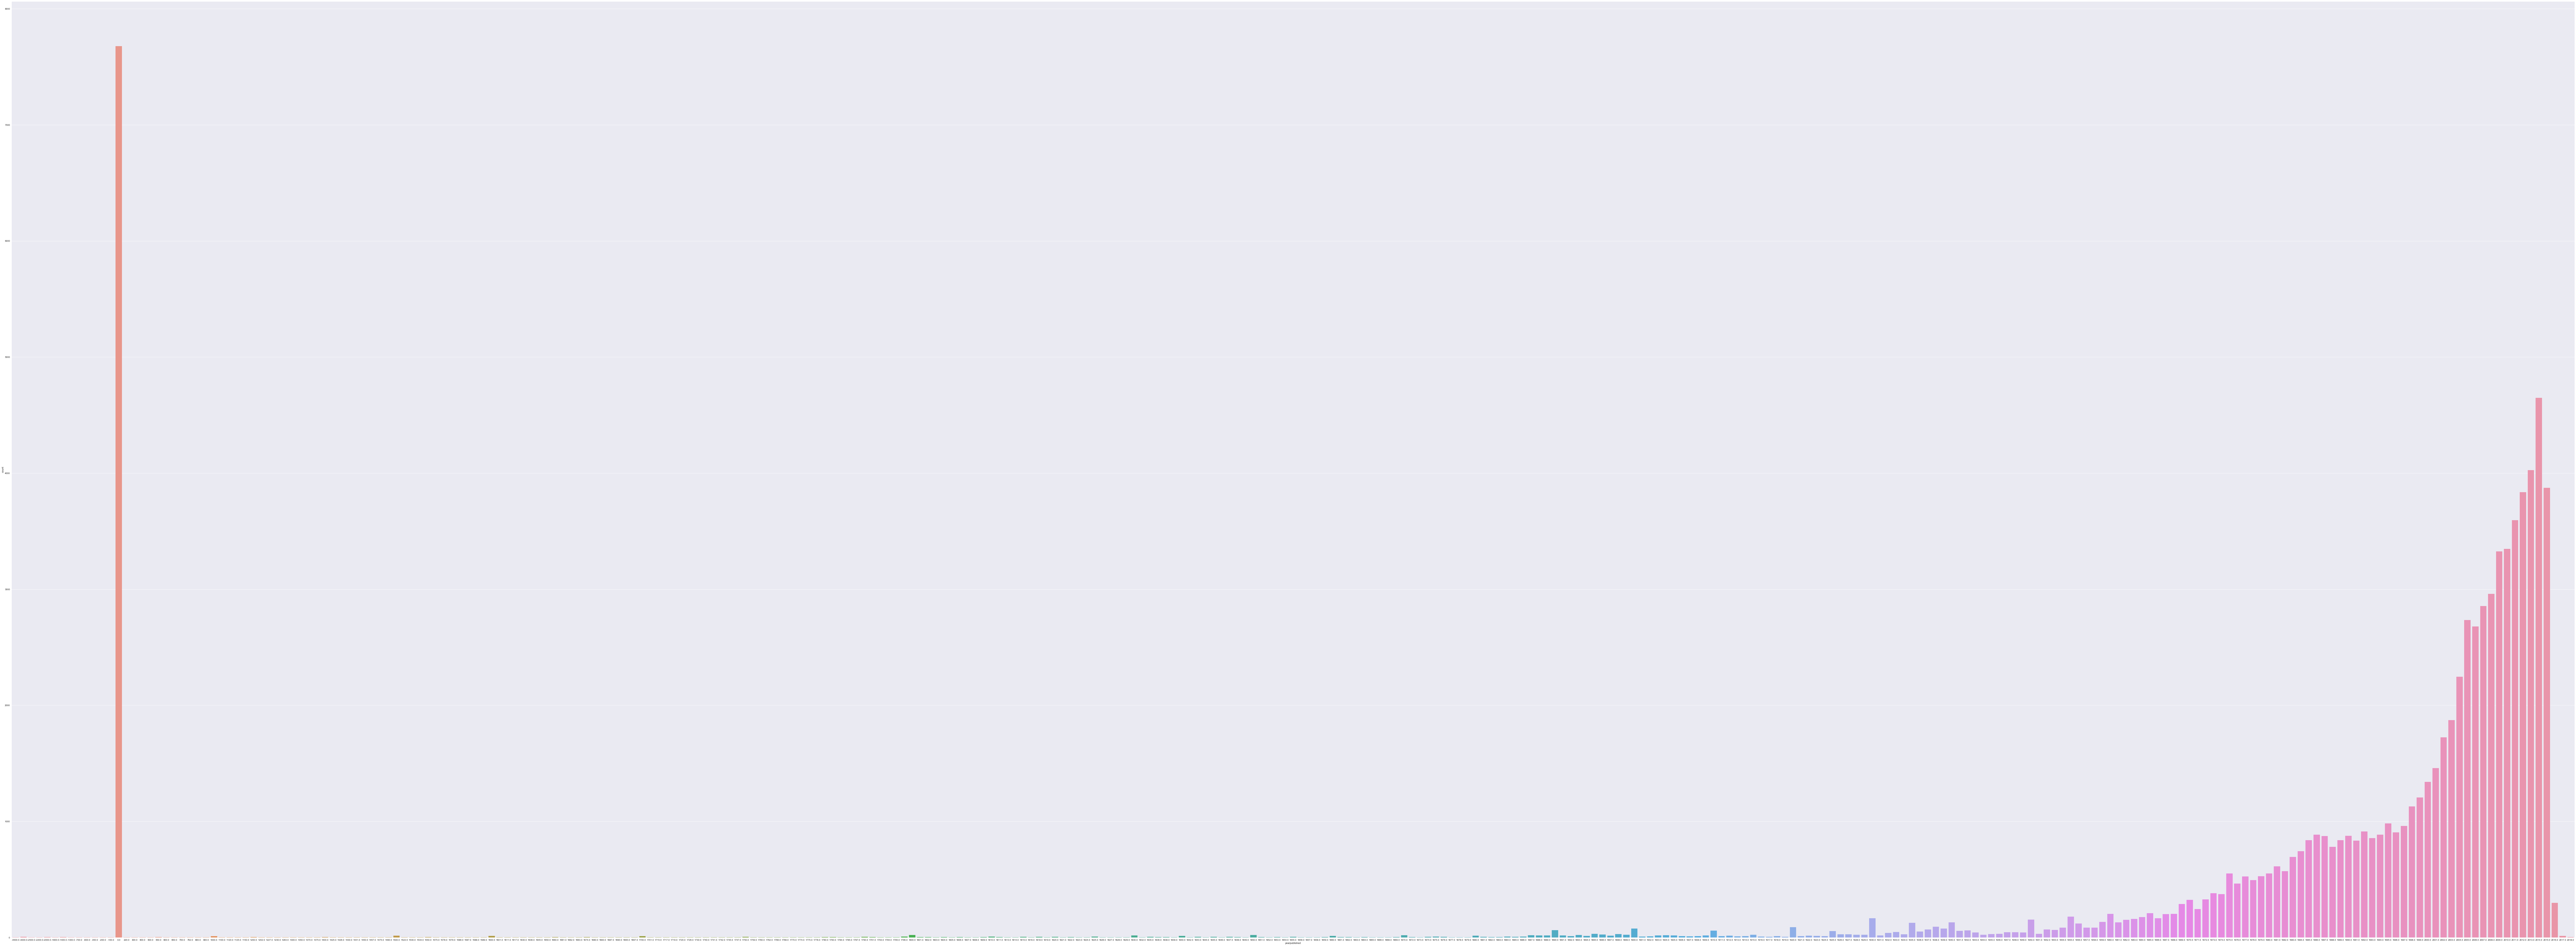

In [90]:
plt.figure(figsize=(200,75))
sns.countplot(df['yearpublished'])

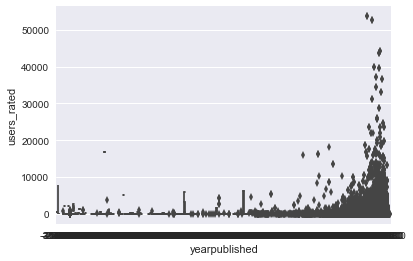

In [92]:
sns.boxplot(df['yearpublished'],y=df['users_rated'])